In [1]:
import numpy as np
import pandas as pd

#loading the dataset
df=pd.read_csv('spam.csv',sep=',',encoding='latin-1')
#df=pd.read_csv('spam.csv')
print(df)


        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [2]:

#finding no. of rows and columns
print(df.shape)


(5572, 5)


In [3]:

############### data cleaning #######################
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [4]:

#dropping unnecessary columns...with no or less non null values
#unnamed2 has 50
#unnamed3 has 12
#unnamed4 has 6 non null values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) #inplace =true as we want to make changes in original dataset
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:

#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
print("****after renaming and removing extra columns:****\n")
print(df)

****after renaming and removing extra columns:****

     target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [6]:

#using label encoder for assignng ham=0 and spam=1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target']) #ham assigned with 0 and spam with 1
print("****assigning ham=0 and spam=1***")
print(df.head())


****assigning ham=0 and spam=1***
   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [7]:

#checking for missing values
print(df.isnull().sum())


target    0
text      0
dtype: int64


In [8]:

#checking for duplicate values
print("*** no of duplicate values *****")
print(df.duplicated().sum())


*** no of duplicate values *****
403


In [9]:

#removing duplicates
df=df.drop_duplicates(keep='first')
print("** after removing duplicates****")
print(df.duplicated().sum())


** after removing duplicates****
0


In [10]:
df.shape

(5169, 2)

In [11]:

################# EDA (data analysis) ###################
#Exploratory Data Analysis

#checking percentage of spam and ham
df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

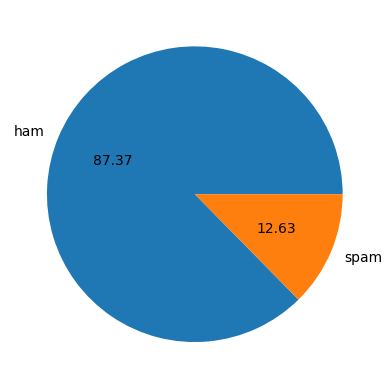

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show() #data is imbalaned


In [13]:

import nltk   #natural language toolkit
nltk.download('punkt')
#This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:

df['num_characters']=df['text'].apply(len) #gives the number of characters in each row of the text...stored them in a new column
df.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #finding no of words in the text
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [16]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:

#analysing ham and spam messages using desc
print("*** analysing ham messages ***")
print(df[df['target']==0][['num_characters','num_words','num_sentences']].describe())
print("*** analysing spam messages ***")
print(df[df['target']==1][['num_characters','num_words','num_sentences']].describe())
#on analysing...we found spam meassages are a bit longer than ham


*** analysing ham messages ***
       num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000
*** analysing spam messages ***
       num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000


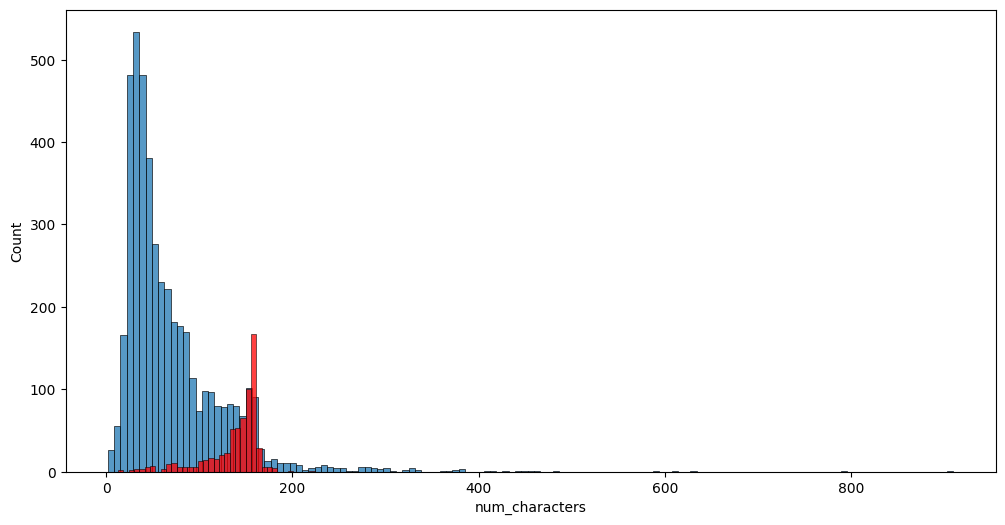

In [18]:

import seaborn as sns
#plotitng the analysis using histogram
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()


In [19]:

#analysing correlation coefficient using heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()  #data has multicolinearity...we'll take num_char as its correlation with target is high


ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [20]:


####################### Data Preprocessing ####################
#1. Lower case
#2. Tokenization
#3. Removing special characters
#4. Removing stop words and puntuation
#5. Stemming

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps=PorterStemmer()

def transform_text(text):
    #converting text to lower
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    #removing special char
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    # removing stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)  
    text=y[:]
    y.clear()
    #stemming
    for i in text:
        y.append(ps.stem(i))            
   
    return " ".join(y)        

transform_text('Hey! Did you like my ML project?')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


'hey like ml project'

In [21]:


df['transformed_text'] = df['text'].apply(transform_text)
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [22]:
####### creating wordcloud for spam and ham, representing most common words
## firstly do pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


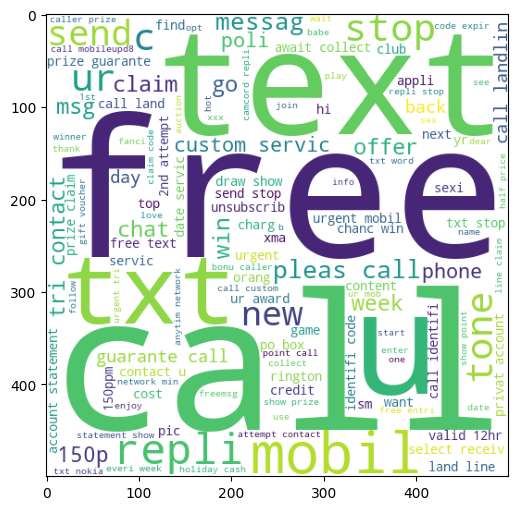

In [23]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)  #shows all the common words in spam messages

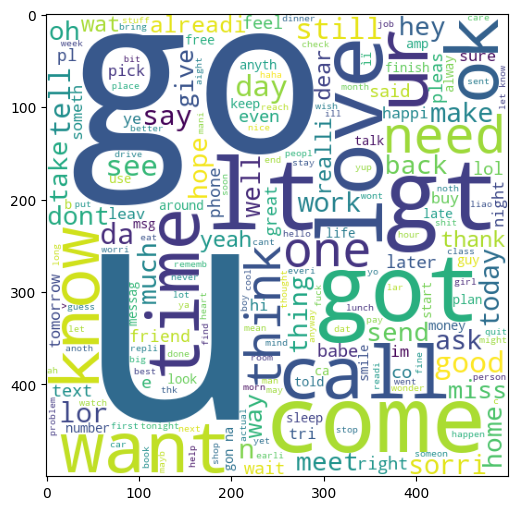

In [24]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)  #shows most commin words in ham messages

In [25]:
#getting top 70 words in spam msgs
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [26]:
len(spam_corpus)


9939

In [27]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(1500))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
...,...,...
1495,08702490080,1
1496,vpod,1
1497,09090204448,1
1498,minapn,1


In [28]:
 #getting top 70 words in ham msgs
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus) 

35404

In [29]:
from collections import Counter 
pd.DataFrame(Counter(ham_corpus).most_common(1500))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
...,...,...
1495,seven,3
1496,thanksgiv,3
1497,lay,3
1498,lone,3


In [30]:
################# Model Building- Naive Bayes ###############
# step1. Convert text to numbers/vectors using bag of words

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)  #on doing max_features=3000, accuracy of NB increased
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [31]:
X.shape

(5169, 3000)

In [32]:
y=df['target'].values

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2) 
 

In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
#Gaussian NaiveBayes
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1,average='micro'))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932
0.8694390715667312


In [35]:
#Mutinomial NaiveBayes
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2,average='micro'))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
0.9709864603481625


In [36]:
#bernoulli NaiveBayes
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3,average='micro'))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
0.9835589941972921


In [37]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    score=clf.score(X_test,y_test)
    recall=recall_score(y_test, y_pred, average='micro')
    conf_matrix=confusion_matrix(y_test,y_pred)

    return accuracy,precision,score,recall,conf_matrix

In [38]:
### MODEL-2 Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=5)
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.9294003868471954,
 0.8282828282828283,
 0.9294003868471954,
 0.9294003868471954,
 array([[879,  17],
        [ 56,  82]], dtype=int64))

In [39]:
### MODEL-3 K-Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier() 
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9052224371373307,
 1.0,
 0.9052224371373307,
 0.9052224371373307,
 array([[896,   0],
        [ 98,  40]], dtype=int64))

In [40]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',gamma=10.0)
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9787234042553191,
 0.9754098360655737,
 0.9787234042553191,
 0.9787234042553191,
 array([[893,   3],
        [ 19, 119]], dtype=int64))

In [41]:
from sklearn.model_selection import cross_val_score
#for classifier in clfs:
print("Gaussian:")
scores = cross_val_score(gnb,X,y,cv=7)
print(scores)
print(scores.mean())


Gaussian:
[0.86603518 0.85250338 0.85926928 0.8604336  0.86720867 0.87940379
 0.8604336 ]
0.8636125033200843


In [42]:

print("\nMultinomial:")
scores = cross_val_score(mnb,X,y,cv=7)
print(scores)
print(scores.mean())



Multinomial:
[0.9864682  0.96752368 0.97834912 0.9701897  0.97831978 0.97696477
 0.96612466]
0.9748485596203343


In [43]:

print("\nBernoulli:")
scores = cross_val_score(bnb,X,y,cv=7)
print(scores)
print(scores.mean())



Bernoulli:
[0.99188092 0.97699594 0.9864682  0.98238482 0.97696477 0.97831978
 0.97831978]
0.9816191743978139


In [44]:

print("\nDecision Tree Classifier:")
scores = cross_val_score(dtc,X,y,cv=7)
print(scores)
print(scores.mean())



Decision Tree Classifier:
[0.9391069  0.94181326 0.94181326 0.93631436 0.93766938 0.91734417
 0.9403794 ]
0.9363486772312147


In [45]:

print("\nK-Neighbors classifier:")
scores = cross_val_score(knc,X,y,cv=7)
print(scores)
print(scores.mean())



K-Neighbors classifier:
[0.9188092  0.91069012 0.91069012 0.91598916 0.90921409 0.91056911
 0.91327913]
0.9127487051015881


In [46]:

print("\nSupport Vector Classifier:")
scores = cross_val_score(svc,X,y,cv=7)
print(scores)
print(scores.mean())


Support Vector Classifier:
[0.98511502 0.97834912 0.98105548 0.97831978 0.98644986 0.97831978
 0.97425474]
0.9802662563644774


In [ ]:
#as precision of mnb is more than bnb using tifd and here precision matters more than accuracy, therefor we are using multinomial naiveBayes
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))
